# BUILDING ENERGY CONSUMPTION PREDICTION

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#fe">Feature Engineering</a></li>
<li><a href="#dp">Data Processing</a></li>
<li><a href="#mb">Modelling</a></li>
<li><a href="#conclusions">Summary</a></li>
</ul>

<a name = "intro"></a>
## 1. Introduction
- Climate change is a globally relevant, urgent, and multi-faceted issue heavily impacted by energy policy and infrastructure. Addressing climate change involves mitigating greenhouse gas emissions and preparing for unavoidable consequences. Mitigation of GHG emissions requires changes to electricity systems, transportation, buildings, industry, and land use

- According to a report issued by the International Energy Agency (IEA), the lifecycle of buildings from construction to demolition were responsible for 37% of global energy-related and process-related CO2 emissions in 2020. It is possible to drastically reduce the energy consumption of buildings by a combination of easy-to-implement fixes and state-of-the-art strategies. For example, retrofitted buildings can reduce heating and cooling energy requirements by 50-90 percent. Many of these energy efficiency measures also result in overall cost savings and yield other benefits, such as cleaner air for occupants. This potential can be achieved while maintaining the services that buildings provide.

### 1.1 Objective
Analyze differences in building energy efficiency, creating models to predict building energy consumption as  accurate predictions of energy consumption can help policymakers target retrofitting efforts to maximize emissions reductions.The evaluation metric for these prediction is Root Mean Squared Error (RMSE).

### 1.2 Data Source
- The data set used in notebook was created by the collaboration of
    - Climate Change AI (CCAI)
    - Lawrence Berkeley National Laboratory (Berkeley Lab)
    - Environmental Protection Agency

In [1]:
#Import librarys
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

In [2]:
#settings
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../Dataset/data.csv')
df.head(4)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3


In [4]:
#rows and columns
print('Number of rows are:', df.shape[0]) 
print('Number of columns are:', df.shape[1])

Number of rows are: 75757
Number of columns are: 64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

<a name = "wrangling"></a>
##  2. Data Wrangling

In [6]:
#percentage of missing values
(df.isnull().sum()[df.isnull().sum()> 0])/df.shape[0] *100

year_built                    2.424858
energy_star_rating           35.256148
direction_max_wind_speed     54.228652
direction_peak_wind_speed    55.190939
max_wind_speed               54.228652
days_with_fog                60.451179
dtype: float64

In [7]:
#drop colimns with greather than 50 percent of values mmisssing
null_columns=['direction_max_wind_speed','max_wind_speed','direction_peak_wind_speed','days_with_fog',]
for column in null_columns:
    df=df.drop(column, axis=1)
df=df.dropna()

In [8]:
#check and drop duplicated rows duplicate rows
df.duplicated().sum()
print(f'{df.duplicated().sum()} duplicated values in dataset')
df=df.drop(df[df.duplicated()].index)

0 duplicated values in dataset


In [9]:
df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,id
count,48445.000000,4.844500e+04,48445.000000,48445.000000,48445.000000,48445.000000,48445.000000,48445.000000,48445.000000,48445.000000,...,48445.000000,48445.000000,48445.000000,48445.000000,48445.000000,48445.000000,48445.000000,48445.0,48445.000000,48445.000000
mean,4.823449,1.773987e+05,1953.320817,61.043327,41.844801,10.790133,33.465387,58.152606,9.470018,34.596930,...,52.313985,20.077923,6.135762,1.100403,84.962205,13.707503,0.192961,0.0,80.845025,41230.499990
std,1.255349,2.555118e+05,39.408589,28.658852,56.582396,9.875005,7.194351,5.283618,12.924683,9.270633,...,28.041883,14.966164,7.368871,3.215936,26.181737,10.358731,1.230212,0.0,53.530863,22421.998905
min,1.000000,2.395000e+03,0.000000,0.000000,1.800000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.0,1.002998,0.000000
25%,4.000000,6.340000e+04,1927.000000,40.000000,9.100000,4.000000,28.596774,56.000000,-1.000000,29.711538,...,40.000000,11.000000,0.000000,0.000000,75.000000,4.000000,0.000000,0.0,54.450820,16920.000000
50%,5.000000,9.476900e+04,1954.000000,67.000000,25.000000,8.000000,29.966667,58.000000,2.000000,33.910714,...,63.000000,24.000000,4.000000,0.000000,96.000000,12.000000,0.000000,0.0,74.495902,44975.000000
75%,6.000000,1.773800e+05,1980.000000,85.000000,42.700000,11.000000,34.451613,59.000000,15.000000,37.706897,...,66.000000,34.000000,9.000000,1.000000,106.000000,17.000000,0.000000,0.0,95.736712,59794.000000
max,6.000000,4.483315e+06,2015.000000,100.000000,470.300000,41.000000,55.096774,77.000000,42.000000,56.948276,...,137.000000,93.000000,59.000000,31.000000,136.000000,52.000000,10.000000,0.0,970.388586,75756.000000


<a name = "eda"></a>
## 3. Exploratory Data Analysis

### 3.1 Distribution of Target Feature

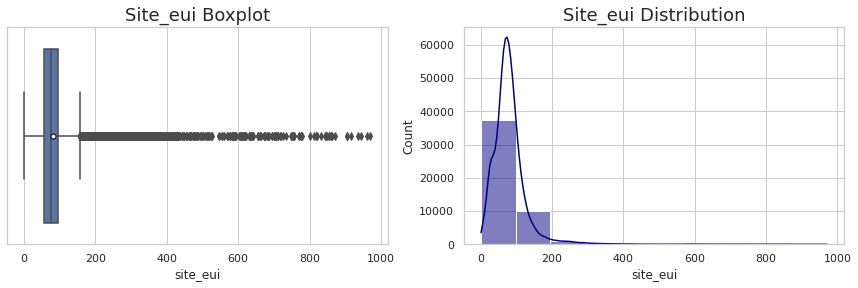

In [10]:
plt.figure(figsize=(15,4))# figure
ax1=plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='site_eui', ax=ax1, showmeans=True,meanprops={"marker":"o",
"markerfacecolor":"white","markersize":"5","markeredgecolor":"black"})
plt.title('Site_eui Boxplot', fontsize=18)
ax2=plt.subplot(1, 2, 2)
sns.histplot(data=df, x='site_eui', bins=10, kde=True, color = 'navy', ax=ax2)
plt.title('Site_eui Distribution', fontsize=18);

- Target feature ```site_eui ``` left skwed with few outliers
- Minimum and maximum value of 1 and 970 respectivly, standard deviation of 54
- Mean of 80.845025 and median of 74.495902

### 3.2  Building Class and State Factor

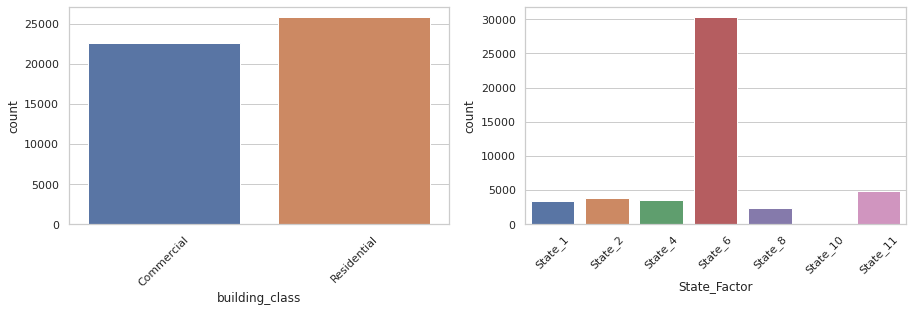

In [11]:
plt.figure(figsize=(15,4)) #figure
ax1=plt.subplot(1, 2, 1)
sns.countplot(data=df, x='building_class', ax=ax1)
plt.xticks(rotation=45)
ax2=plt.subplot(1, 2, 2)
sns.countplot(data=df, x='State_Factor', ax=ax2); 
plt.xticks(rotation=45);

### 3.3 Elevation, Energy Star Rating, Floor Area and  Cooling Degree Days Boxplot

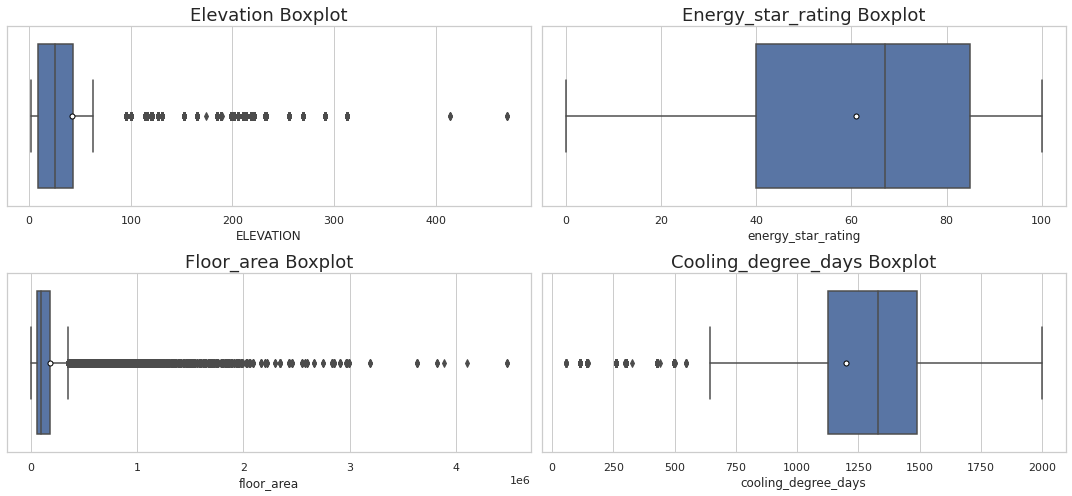

In [12]:
x=['ELEVATION', 'energy_star_rating', 'floor_area', 'cooling_degree_days']
plt.figure(figsize=(15,7))
for i in x:  #boxplot of the above columns in x list
    ax1=plt.subplot(2, 2, x.index(i)+1)
    sns.boxplot(data=df, x=i,ax=ax1, showmeans=True,meanprops={"marker":"o",
     "markerfacecolor":"white","markersize":"5","markeredgecolor":"black"})
    plt.title(f'{i.capitalize()} Boxplot', fontsize=18);                               
    plt.tight_layout()


### 3.4 Elevation, Energy Star Rating, Floor Area and  Cooling Degree Days Distribution

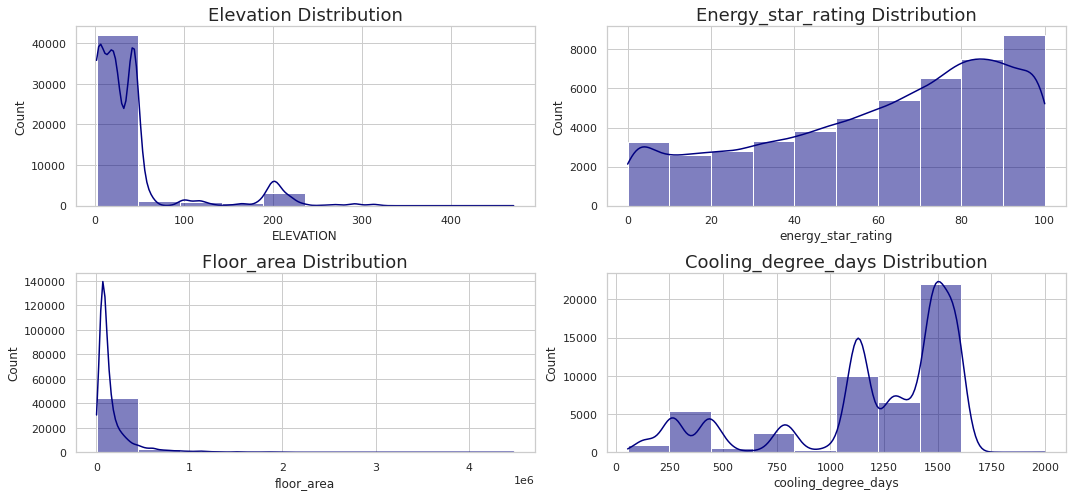

In [13]:
x=['ELEVATION', 'energy_star_rating', 'floor_area', 'cooling_degree_days']
plt.figure(figsize=(15,7))
for i in x:  #boxplot of the above columns in x list
    ax1=plt.subplot(2, 2, x.index(i)+1)
    sns.histplot(data=df, x=i, bins=10, kde=True, color = 'navy', ax=ax1)
    plt.title(f'{i.capitalize()} Distribution', fontsize=18);                               
    plt.tight_layout()

### 3.5 Facility Type

In [14]:
#Rename facility type with less than 1000 as others
facilityType = list(df['facility_type'].value_counts()[df['facility_type'].value_counts() < 1000].index)
def facility(facility):
    if facility in facilityType:
        facility = 'Others'
    else:
        facility =  facility
    return facility
facilityType = df['facility_type'].apply(facility)
facilityType=facilityType.value_counts()

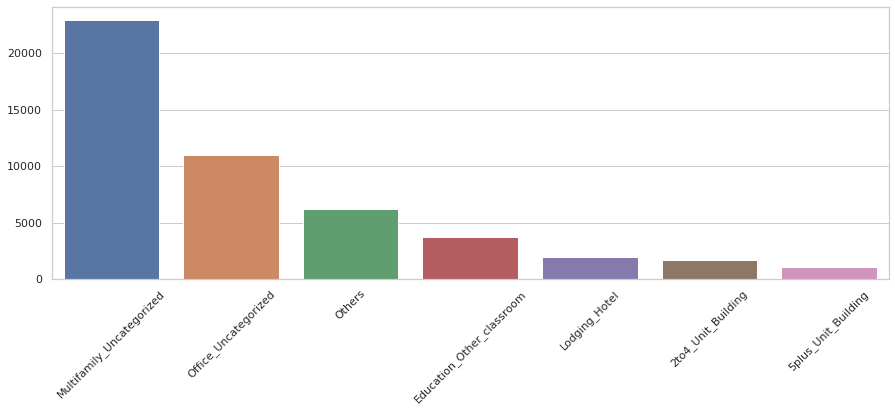

In [15]:
#ploting
plt.figure(figsize=(15,5))
sns.barplot(x=facilityType.index, y=facilityType.values)
plt.xticks(rotation=45);

<a name ="fe"></a>
## 4. Feature Engineering

### 4.1 Building Age

In [16]:
# get the age of the building for the year
df=df.mask(df['year_built'] == 0, 2022)
def year(data):
    year = 2022 - data
    return year
df['Age'] = df['year_built'].apply(year)

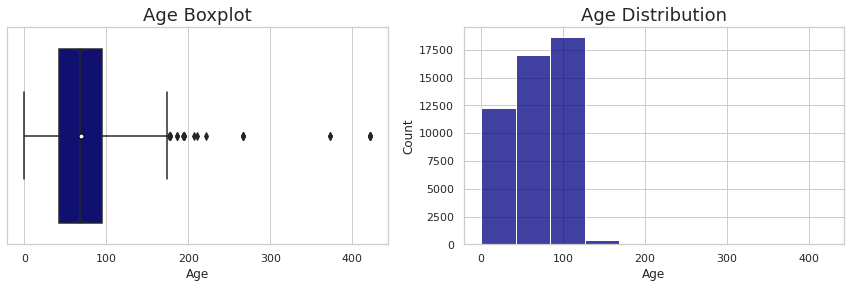

In [17]:
plt.figure(figsize=(15,4))# figure
ax1=plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Age', ax=ax1, color = 'navy', showmeans=True,meanprops={"marker":"o",
"markerfacecolor":"white","markersize":"5","markeredgecolor":"black"})
plt.title('Age Boxplot', fontsize=18)
ax2=plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Age', bins=10, color = 'navy', ax=ax2)
plt.title('Age Distribution', fontsize=18);

- Building age is Normally distributed with a few outliers
- Majority of the building in the observation are between 0 to 100 years with the oldest been 422 years old

### 4.2 Spring Summer Fall and Winter Temprature

In [18]:
df['spring'] = (df['march_avg_temp'] + df['april_avg_temp'] + df['may_avg_temp'])/3
df['summer'] = (df['june_avg_temp'] + df['july_avg_temp'] + df['august_avg_temp'])/3
df['fall'] = (df['september_avg_temp'] + df['october_avg_temp'] + df['november_avg_temp'])/3
df['winter'] = (df['december_avg_temp'] + df['january_avg_temp'] + df['february_avg_temp'])/3

### 4.3 Days Below and Above Certain Temperature

In [19]:
# concat days below and days above certain degrees
df['days_below_F'] = df['days_below_30F']+df['days_below_20F']+df['days_below_10F']+df['days_below_0F']
df['days_above_F'] = df['days_above_80F']+df['days_above_90F']+df['days_above_100F']#+df['days_above_110F']
col = ['days_below_30F','days_below_20F','days_below_10F','days_below_0F',
        'days_above_80F','days_above_90F','days_above_100F']
df=df.drop(col ,axis=1,)

<a name ="dp"></a>
## 5. Data Processing

### 5.1 Dropping Irrelevant Columns

In [20]:
# snowfall_inches and snowdepth_inches are highly correlated, drop one of them
col = ['snowdepth_inches','year_built','building_class']
df=df.drop(col, axis=1)

In [21]:
# days_above_110F contain only 1 value id is also irrelevant 
col = [ 'days_above_110F', 'id']
df=df.drop(col, axis=1)

In [22]:
max_temp =['january_max_temp', 'february_max_temp', 'march_max_temp','april_max_temp', 'may_max_temp',
 'june_max_temp', 'july_max_temp','august_max_temp', 'september_max_temp', 'october_max_temp',
    'november_max_temp', 'december_max_temp']
df=df.drop(columns=max_temp)

In [23]:
min_temp = [ 'january_min_temp', 'february_min_temp','march_min_temp','april_min_temp', 'may_min_temp', 
            'june_min_temp','july_min_temp', 'august_min_temp', 'september_min_temp','october_min_temp', 
            'november_min_temp', 'december_min_temp',]
df=df.drop(columns=min_temp)

In [24]:
avg_temp=['january_avg_temp','february_avg_temp','march_avg_temp','april_avg_temp', 'may_avg_temp','june_avg_temp',
          'july_avg_temp', 'august_avg_temp','september_avg_temp', 'october_avg_temp', 'november_avg_temp',
          'december_avg_temp',]
df=df.drop(columns=avg_temp)

### 5.2 Feature Selection

In [25]:
# Create correlation matrix
corr_matrix = df.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
df=df.drop(to_drop,axis=1)

Correlation Matrix 



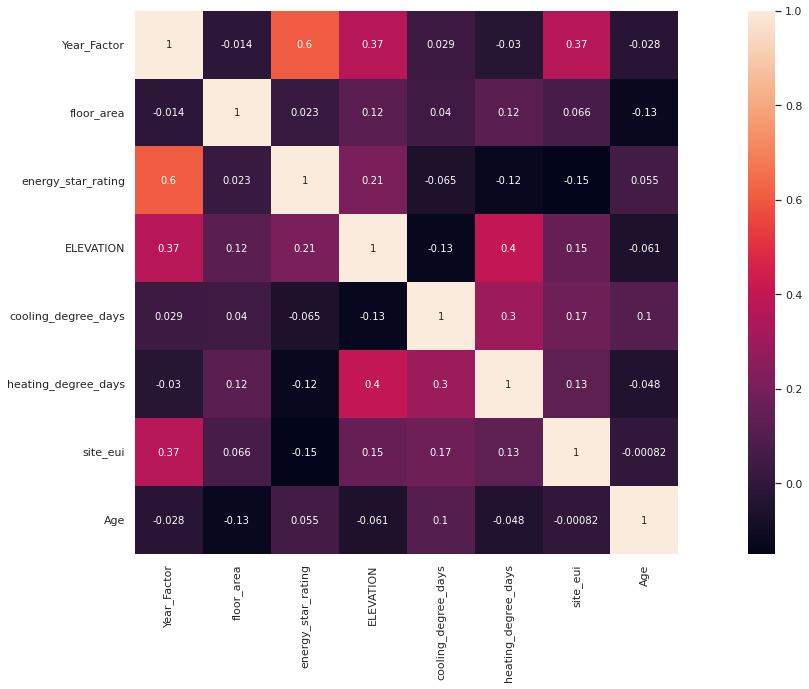

In [26]:
#Heat map
print("Correlation Matrix","\n")    
correlation=df.corr(method="pearson")
plt.figure(figsize=(25,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True);

### 5.3 Label Encoding

In [27]:
df=df.drop(df[df['State_Factor']==2022].index, axis=0)
df2=df.copy()

In [28]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()

In [29]:
label_col=['State_Factor','facility_type']
def labeling(col):
        df[col]=label.fit_transform(df[col])

In [30]:
for i in label_col:
    labeling(i)

### 5.4 Sliptting 

In [31]:
X = df.drop(columns='site_eui') #  drop the target column
y= df['site_eui'] # target column

In [32]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

<a name ="mb"></a>
## 6. Modelling

In [33]:
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

### 6.1 Model Building

In [34]:
lgb = lgb.LGBMRegressor()
xgb= XGBRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()

In [35]:
# training the model
lgb.fit(X_train, y_train)
xgb.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

GradientBoostingRegressor()

### 6.2 Model Predicton

In [36]:
# make prediction with trained model
lgb_prediction = lgb.predict(X_test)
xgb_prediction = xgb.predict(X_test)
rf_prediction = rf.predict(X_test)
gb_prediction = gb.predict(X_test)

In [37]:
#make a data frame and compare actual value with model prediction
preddf=pd.DataFrame({
    'actual':y_test,
    'lgb_prediction': lgb_prediction,
    'xgb_prediction': xgb_prediction,
    'rf_prediction': rf_prediction,
    'gb_prediction': gb_prediction
})
preddf.sample(5)

,actual,lgb_prediction,xgb_prediction,rf_prediction,gb_prediction
48308,77.291498,75.389662,71.913376,75.284658,77.066706
61006,76.191257,86.424602,80.895210,84.429218,91.408329
5400,63.625683,65.202924,57.767456,59.557860,65.190659
41192,89.949589,72.789773,73.274414,67.683692,71.601488
62011,48.267760,51.836392,50.867092,55.557841,50.156921


### 6.3 Model Evaluation

In [38]:
from sklearn import metrics

In [39]:
import math
def rmse(y_test, y_pred): # function to convert mean square to root mean square
    return math.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [40]:
lgb_mse=rmse(y_test, lgb_prediction)
xgb_mse=rmse(y_test, xgb_prediction)
rf_mse=rmse(y_test, rf_prediction)
gb_mse=rmse(y_test, gb_prediction)
print(f'lgb_mse: {lgb_mse} \nxgb_mse: {xgb_mse} \nrf_mse: {rf_mse} \ngb_mse: {gb_mse}')

lgb_mse: 33.78253091165633 
xgb_mse: 30.699138820022696 
rf_mse: 32.5108358918918 
gb_mse: 37.186597221340286


### 6.4 Hyperparameter tunning

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
parameters ={# Setting training with parameters
    "learning_rate":[0.01, 0.1],
    'n_estimators':[100, 500, 1000], 
    'subsample':[0.1, 0.3, 0.6, 0.9, 1],
    'max_depth':[3, 6, 9],}

In [43]:
xgb= XGBRegressor()
xgb_rscv = RandomizedSearchCV(gb, parameters,scoring='neg_root_mean_squared_error', cv=3, n_iter=3)
xgb_tuned = xgb_rscv.fit(X_train,y_train)
print("train_rsme:",abs(xgb_tuned.best_score_))

train_rsme: 30.064773512103006


In [44]:
xgb_tuned_predictions=xgb_tuned.predict(X_test)
xgb_mse=rmse(y_test, xgb_tuned_predictions)
print("test_rsme: ",xgb_mse)

test_rsme:  29.291475856956566


In [45]:
#!pip install sweetviz
import sweetviz as sv

In [46]:
report = sv.compare([X_train, "train data"], [X_test, "test data"])
report.show_html()

                                             |           | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
